In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve

# from xgboost import XGBClassifier
from pandas import DataFrame


import matplotlib.pyplot as plt

from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import datasets


In [7]:
digits = datasets.load_digits()

# flatten the images
# n_samples = len(digits.images)
# data = digits.images.reshape((n_samples, -1))


# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=False
)

In [93]:
unique, counts = np.unique(digits.target, return_counts=True)

dict(zip(unique, counts))

{0: 178,
 1: 182,
 2: 177,
 3: 183,
 4: 181,
 5: 182,
 6: 181,
 7: 179,
 8: 174,
 9: 180}

**Decision Tree**

array([0.        , 0.00068748, 0.00068914, 0.00069589, 0.00069589,
       0.00069589, 0.00069589, 0.00069589, 0.00069589, 0.00069589,
       0.00069589, 0.00069589, 0.00069589, 0.00069589, 0.00069589,
       0.00069589, 0.00092786, 0.00092786, 0.00092786, 0.00101807,
       0.00104384, 0.00104384, 0.00111343, 0.00111343, 0.00115982,
       0.00119296, 0.00125261, 0.00125261, 0.00130992, 0.00131854,
       0.0013222 , 0.00133372, 0.00133826, 0.00134752, 0.00135085,
       0.0013524 , 0.00135366, 0.0013697 , 0.00137773, 0.0013789 ,
       0.00138185, 0.00139179, 0.00139179, 0.00139179, 0.0014912 ,
       0.0014912 , 0.0014912 , 0.00167015, 0.0017081 , 0.00173974,
       0.00180932, 0.00182672, 0.00185572, 0.00185572, 0.00193856,
       0.00193856, 0.00198388, 0.00202969, 0.00208768, 0.002165  ,
       0.00220577, 0.00226663, 0.00231965, 0.0023453 , 0.00237979,
       0.00242671, 0.00253052, 0.00254747, 0.002584  , 0.0026533 ,
       0.00284684, 0.00290287, 0.00292276, 0.00297582, 0.00297

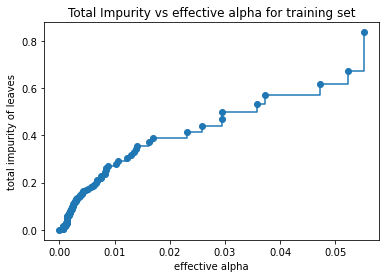

In [15]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
# ccp_alphas

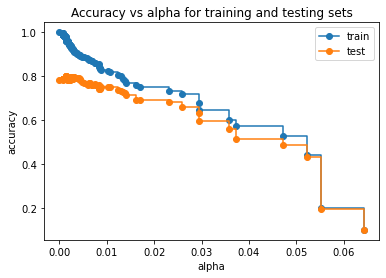

In [16]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [25]:
dt_clf = DecisionTreeClassifier(criterion='gini', ccp_alpha=0)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.8027777777777778

**AdaBoost**

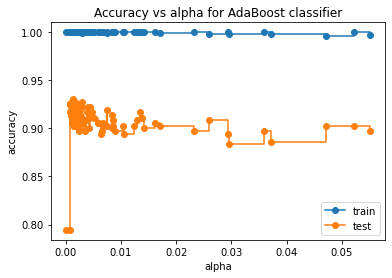

0.9305555555555556 0.9138888888888889 0.0009278589654372535


In [28]:
clfs = []
for ccp_alpha in ccp_alphas:
    base = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf = AdaBoostClassifier(base_estimator=base, random_state=0, n_estimators=100)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for AdaBoost classifier")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()
print(max(test_scores), test_scores[33], ccp_alphas[33])

In [35]:
base = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0013)
boost_clf = AdaBoostClassifier(base_estimator=base, random_state=0, n_estimators=100)
boost_clf.fit(X_train, y_train)
boost_clf.score(X_test, y_test)


0.925

**KNN**

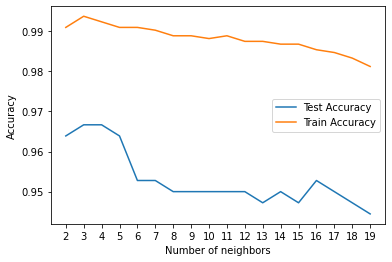

In [36]:
from sklearn.neighbors import KNeighborsClassifier

train_acc=[]
test_acc=[]
list_score=[]

for i in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train, y_train)

    train_predict = knn.predict(X_train)
    test_predict = knn.predict(X_test)

    test_acc = accuracy_score(y_test, test_predict)
    train_acc = accuracy_score(y_train, train_predict)
#     print('Train score:',train_acc,'Test score:',test_acc)
#     print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_predict, y_train),accuracy_score(test_predict, y_test)]) 
    
    
df3 = DataFrame(list_score,columns=['n_neighbors','Train Accuracy','Test Accuracy'])
plt.plot(df3['n_neighbors'],df3['Test Accuracy'],label='Test Accuracy')
plt.plot(df3['n_neighbors'],df3['Train Accuracy'],label='Train Accuracy')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.xticks(range(2, 20))
plt.legend()    

In [42]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.9666666666666667

**SVM**

In [41]:
# Create a classifier: a support vector classifier
svm_clf = svm.SVC(gamma=0.001)
 
# Learn the digits on the train subset
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.9583333333333334

**MLP**

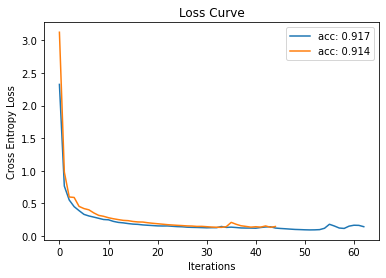

In [57]:
mlp_clf1 = MLPClassifier(hidden_layer_sizes=(50, 50, 50),  max_iter=500, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf1.fit(X_train, y_train)
score1 = round(mlp_clf1.score(X_test, y_test), 3)
plt.plot(mlp_clf1.loss_curve_, label = f'acc: {score1}')

mlp_clf2 = MLPClassifier(hidden_layer_sizes=(60, 90, 60),  max_iter=500, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf2.fit(X_train, y_train)
score2 = round(mlp_clf2.score(X_test, y_test), 3)
plt.plot(mlp_clf2.loss_curve_, label = f'acc: {score2}')


plt.title("Loss Curve")
plt.xlabel('Iterations')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

**Eval**

0.7841333952336738
0.7824667285670072
0.7891256576911172
0.7774497059733829


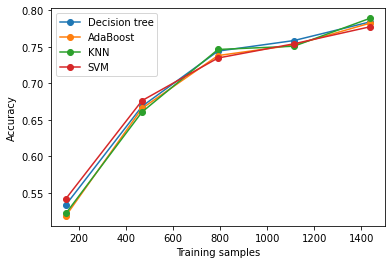

In [55]:
estimaters = [dt_clf, boost_clf, knn_clf, svm_clf]

for estimater in estimaters:
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        dt_clf,
        digits.data, 
        digits.target,
    #     scoring=scoring,
        cv=5,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5),
        return_times=True,
    )
    test_scores_mean = np.mean(test_scores, axis=1)
    print(test_scores_mean[-1])

    plt.plot(
            train_sizes, test_scores_mean, "o-"
        )
plt.xlabel('Training samples')
plt.ylabel('Accuracy')
plt.legend(['Decision tree', 'AdaBoost', 'KNN', 'SVM'])

In [98]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
#     if axes is None:
#         _, axes = plt.subplots(1, 3, figsize=(20, 5))

    ax1, ax2, ax3 = axes

    ax1.set_title(title)
    if ylim is not None:
        ax1.set_ylim(*ylim)
    ax1.set_xlabel("Training examples")
    ax1.set_ylabel("Accuracy")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
        random_state = 0,
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    print('Accuracy', train_scores_mean[-1], test_scores_mean[-1])

    # Plot learning curve
    ax1.grid()
    ax1.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    ax1.plot(
        train_sizes, train_scores_mean, "o-", label="Training"
    )
    ax1.set_ylim([0.5,1.05])
    ax1.set_xlabel("Training examples")
    ax1.set_ylabel("Accuracy")
    ax1.set_title("Training Curve")
    ax1.legend(['Decision tree', 'AdaBoost', 'KNN', 'SVM'])

    
    ax2.grid()
    ax2.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
#         color="g",
    )

    ax2.plot(
        train_sizes, test_scores_mean, "o-", label="Cross-validation"
    )
    ax2.set_ylim([0.5,1.05])
    ax2.set_xlabel("Training examples")
    ax2.set_ylabel("Accuracy")
    ax2.set_title("Validation Curve")
    ax2.legend(['Decision tree', 'AdaBoost', 'KNN', 'SVM'])

    
    
    # Plot n_samples vs fit_times
    ax3.grid()
    ax3.plot(train_sizes, fit_times_mean, "o-")
    ax3.fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    ax3.set_ylim([0,0.065])
    ax3.set_xlabel("Training examples")
    ax3.set_ylabel("Training Time")
    ax3.set_title("Scalability of the model")
    ax3.legend(['Decision tree', 'AdaBoost', 'KNN', 'SVM'])


    # Plot fit_time vs score
#     fit_time_argsort = fit_times_mean.argsort()
#     fit_time_sorted = fit_times_mean[fit_time_argsort]
#     test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
#     test_scores_std_sorted = test_scores_std[fit_time_argsort]
#     ax3.grid()
#     ax3.plot(fit_time_sorted, test_scores_mean_sorted, "o-")
#     ax3.fill_between(
#         fit_time_sorted,
#         test_scores_mean_sorted - test_scores_std_sorted,
#         test_scores_mean_sorted + test_scores_std_sorted,
#         alpha=0.1,
#     )
#     if ylim is not None:
#         ax3.set_ylim(*ylim)
#     ax3.set_xlim([0, 0.065])
#     ax3.set_xlabel("Training Time")
#     ax3.set_ylabel("Accuracy")
#     ax3.set_title("Performance of the model")
#     ax3.legend(['Decision tree', 'AdaBoost', 'KNN', 'SVM'])


    return plt

Accuracy 1.0 0.8477777777777777
Accuracy 1.0 0.9716666666666667
Accuracy 0.9923451635351427 0.9872222222222222
Accuracy 0.9987473903966597 0.993888888888889


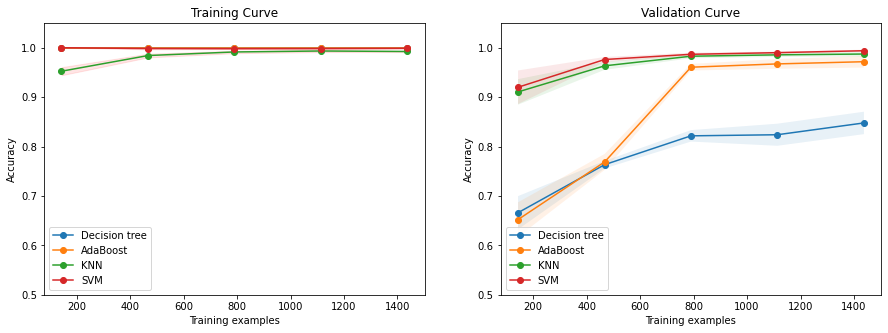

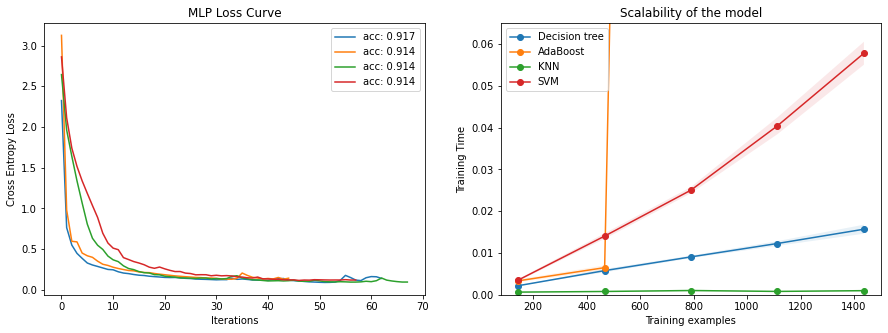

In [99]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig2, axes2 = plt.subplots(1, 2, figsize=(15, 5))

dt_clf = DecisionTreeClassifier(criterion='gini', ccp_alpha=0)
base = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0013)
boost_clf = AdaBoostClassifier(base_estimator=base, random_state=0, n_estimators=100)
knn_clf = KNeighborsClassifier(n_neighbors=3)
svm_clf = svm.SVC(gamma=0.001)

estimaters = [dt_clf, boost_clf, knn_clf, svm_clf]

for estimater in estimaters:
    plot_learning_curve(
        estimater, "Learning Curves", digits.data, digits.target, axes=[axes[0], axes[1], axes2[1]], ylim=(0.5, 1.01), cv=cv, n_jobs=4
    )
    
    
# mlp plots
mlp_clf1 = MLPClassifier(hidden_layer_sizes=(50, 50, 50),  max_iter=500, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf1.fit(X_train, y_train)
score1 = round(mlp_clf1.score(X_test, y_test), 3)
axes2[0].plot(mlp_clf1.loss_curve_, label = f'acc: {score1}')

mlp_clf2 = MLPClassifier(hidden_layer_sizes=(60, 90, 60),  max_iter=500, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf2.fit(X_train, y_train)
score2 = round(mlp_clf2.score(X_test, y_test), 3)
axes2[0].plot(mlp_clf2.loss_curve_, label = f'acc: {score2}')

mlp_clf3 = MLPClassifier(hidden_layer_sizes=(10, 20, 10),  max_iter=500, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf3.fit(X_train, y_train)
score3 = round(mlp_clf3.score(X_test, y_test), 3)
axes2[0].plot(mlp_clf3.loss_curve_, label = f'acc: {score2}')

mlp_clf4 = MLPClassifier(hidden_layer_sizes=(20, 20, 10),  max_iter=500, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf4.fit(X_train, y_train)
score4 = round(mlp_clf4.score(X_test, y_test), 3)
axes2[0].plot(mlp_clf4.loss_curve_, label = f'acc: {score2}')


axes2[0].set_title("MLP Loss Curve")
axes2[0].set_xlabel('Iterations')
axes2[0].set_ylabel('Cross Entropy Loss')
axes2[0].legend()
plt.show()